x_test shape: (10000, 32, 32, 3)
10000 test samples
10000/10000 [==============================] - 2s 245us/step
Test accuracy: 0.8094


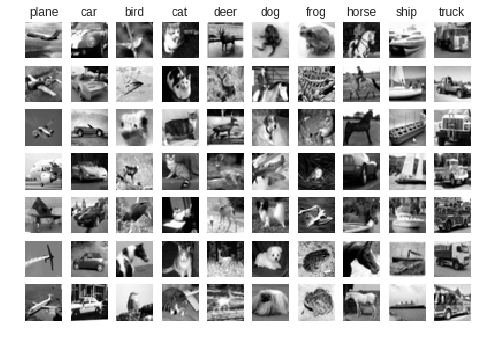

In [4]:

from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2
from keras.models import load_model

num_classes = 10
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'peter_gao_keras_cifar10_trained_model_grey_adata.h5' #change the name of the saved model accordingly
#model_name = 'peter_gao_keras_cifar10_trained_model_grey.h5' #change the name of the saved model accordingly

# The data, split between train and test sets:
_, (x_test, y_test) = cifar10.load_data()
print('x_test shape:', x_test.shape)
print(x_test.shape[0], 'test samples')


'''
#########################################################################
#                    WRITE YOUR CODE HERE                               #
# Convert images to Gray if your saved model is trained with gray       #
#########################################################################
'''
def grayscale(data, dtype='float32'):
  
    r, g, b = np.asarray(.3, dtype=dtype), np.asarray(.59, dtype=dtype), np.asarray(.11, dtype=dtype)
    
    rst = r * data[:, :, :, 0] + g * data[:, :, :, 1] + b * data[:, :, :, 2]
    rst = np.expand_dims(rst, axis=3)
    return rst
  
#x_test = grayscale(x_test)

# Convert class vectors to binary class matrices.
y_test = keras.utils.to_categorical(y_test, num_classes)

model = load_model(os.path.join(save_dir,model_name))

x_test_copy = x_test.copy() #Make copy of the original images for displaying


'''
#########################################################################
#                    WRITE YOUR CODE HERE                               #
# Apply normalization if your saved model is trained with normalization #
#########################################################################
'''

x_test = x_test.astype('float32')

x_test = (x_test-112.5) / 225.0


x_test = x_test.astype('float32')

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test accuracy:', scores[1])


'''
###################################################
#           WRITE YOUR CODE HERE                  #
# Show 7 misclassified samples for each class     #
# This time use model.predict instead, check wiki #
###################################################
'''
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
samples_per_class = 7

prediction = model.predict(x_test)
y_pred = np.argmax(prediction, axis=1)

for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_pred == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        if x_test_copy[idx].shape[-1] == 3:
            plt.imshow(x_test_copy[idx].squeeze().astype('uint8')) #change cmap='gray' when using gray input
        else:
            plt.imshow(x_test_copy[idx].squeeze().astype('uint8'),cmap='gray')

        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()
